In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(10156)

img_arr = np.random.randint(255, size=(5, 3))

print(img_arr)

[[ 32 175  11]
 [208  46  10]
 [250 153 166]
 [111 118  14]
 [123 192  54]]


## Padding

In [3]:
kernel_size = (5, 5)

In [4]:
N, M = img_arr.shape

m, n = kernel_size

In [5]:
# number of rows and columns needed for padding according to the kernel size
n_rows = int((m - 1) / 2)
n_cols = int((n - 1) / 2)

## Top and Bottom Padding

In [6]:
# add top and bottom padding
top_bottom_zeros = np.zeros((n_rows, M))

img_arr = np.vstack([top_bottom_zeros, img_arr, top_bottom_zeros])
print(img_arr)

[[  0.   0.   0.]
 [  0.   0.   0.]
 [ 32. 175.  11.]
 [208.  46.  10.]
 [250. 153. 166.]
 [111. 118.  14.]
 [123. 192.  54.]
 [  0.   0.   0.]
 [  0.   0.   0.]]


## Left and Right Padding

In [7]:
# add left and right padding
left_bottom_zeros = np.zeros((N + n_rows * 2, n_cols)) # (m - 1) rows need to be added
 
img_arr = np.hstack([left_bottom_zeros, img_arr, left_bottom_zeros])
print(img_arr)

[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  32. 175.  11.   0.   0.]
 [  0.   0. 208.  46.  10.   0.   0.]
 [  0.   0. 250. 153. 166.   0.   0.]
 [  0.   0. 111. 118.  14.   0.   0.]
 [  0.   0. 123. 192.  54.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]]


---
# Function

In [8]:
def padding(image_arr, kernel_size):
    N, M = image_arr.shape
    m, n = kernel_size
    
    n_rows = int((m - 1) / 2)
    n_cols = int((n - 1) / 2)
    
    # add top and bottom padding
    top_bottom_zeros = np.zeros((n_rows, M))
    image_arr = np.vstack([top_bottom_zeros, image_arr, top_bottom_zeros])
    
    # add left and right padding
    left_bottom_zeros = np.zeros((N + n_rows * 2, n_cols)) # (m - 1) rows need to be added
    image_arr = np.hstack([left_bottom_zeros, image_arr, left_bottom_zeros])
    
    image_arr = image_arr.astype('uint64')
    
    return image_arr

## Application

In [9]:
with open("alan.pgm") as f_obj:
    data = f_obj.readlines()

metadata = list(map(lambda x: x.strip(), data[:4]))
img_data = list(map(lambda x: int(x.strip()), data[4:]))

In [10]:
metadata

['P2', '# Created by GIMP version 2.10.30 PNM plug-in', '649 849', '255']

In [11]:
img_width, img_height = map(int, metadata[2].split(" "))

In [12]:
img_width, img_height

(649, 849)

In [13]:
img_arr = np.array(img_data).reshape((img_height, img_width))
img_arr

array([[255, 255, 255, ..., 255, 255, 255],
       [120, 120, 120, ...,  92,  92, 255],
       [120, 120, 120, ...,  92,  92, 255],
       ...,
       [ 92,  86,  86, ..., 143, 143, 255],
       [108, 100, 100, ..., 167, 167, 255],
       [118, 112, 112, ..., 157, 157, 255]])

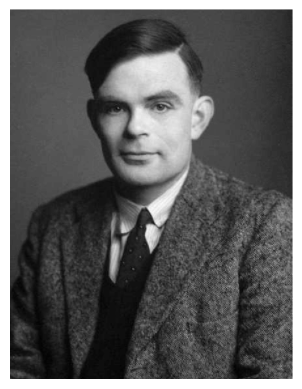

In [14]:
plt.imshow(img_arr, cmap="gray")
plt.axis("off")
plt.show()

In [15]:
# kernel

# sobel
kernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

In [16]:
kernel.shape

(3, 3)

In [17]:
padded_img = padding(img_arr, kernel.shape)
padded_img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 120, 120, ...,  92, 255,   0],
       ...,
       [  0, 108, 100, ..., 167, 255,   0],
       [  0, 118, 112, ..., 157, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint64)

In [18]:
padded_img.shape

(851, 651)

In [20]:
img_arr.shape

(849, 649)

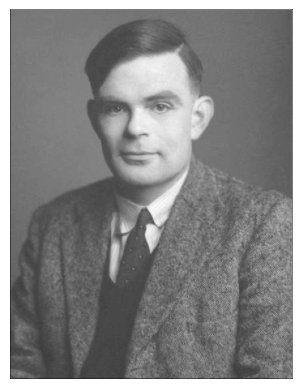

In [19]:
plt.imshow(padded_img, cmap="gray")
plt.axis("off")
plt.show()